In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.read_csv("/content/drive/MyDrive/synthetic_nfl_dataset.csv")

In [20]:
df.head()

,coach_id,race,position_played,coaching_position,years_experience,team_performance_rating,rooney_rule_interview,promoted_to_head,promotion_year,tenure_years
0,1,White,LB,Head Coach,8,0.37,0,1,2023.0,7
1,2,Black,WR,Coordinator,17,0.42,1,0,NaN,4
2,3,Black,OL,Position Coach,20,0.61,1,0,NaN,5
3,4,White,OL,Position Coach,9,0.64,0,0,NaN,4
4,5,White,RB,Assistant Coach,3,0.85,0,0,NaN,1


In [21]:
df.columns

Index(['coach_id', 'race', 'position_played', 'coaching_position',
       'years_experience', 'team_performance_rating', 'rooney_rule_interview',
       'promoted_to_head', 'promotion_year', 'tenure_years'],
      dtype='object')

In [22]:
# calculate promotion rate to head coach by position played and race
grouped = df.groupby(["position_played", "race"])["promoted_to_head"].mean().unstack().fillna(0) * 100
grouped = grouped.round(2)

# show the promotion rate table
grouped


race,Black,Latino,Other,White
position_played,,,,
DB,8.00,0.0,0.0,30.00
DL,0.00,0.0,0.0,28.57
LB,0.00,0.0,0.0,11.11
OL,5.88,0.0,0.0,26.32
QB,5.56,0.0,0.0,33.33
RB,10.00,50.0,0.0,18.18
Special Teams,0.00,0.0,0.0,50.00
WR,3.57,0.0,100.0,46.15


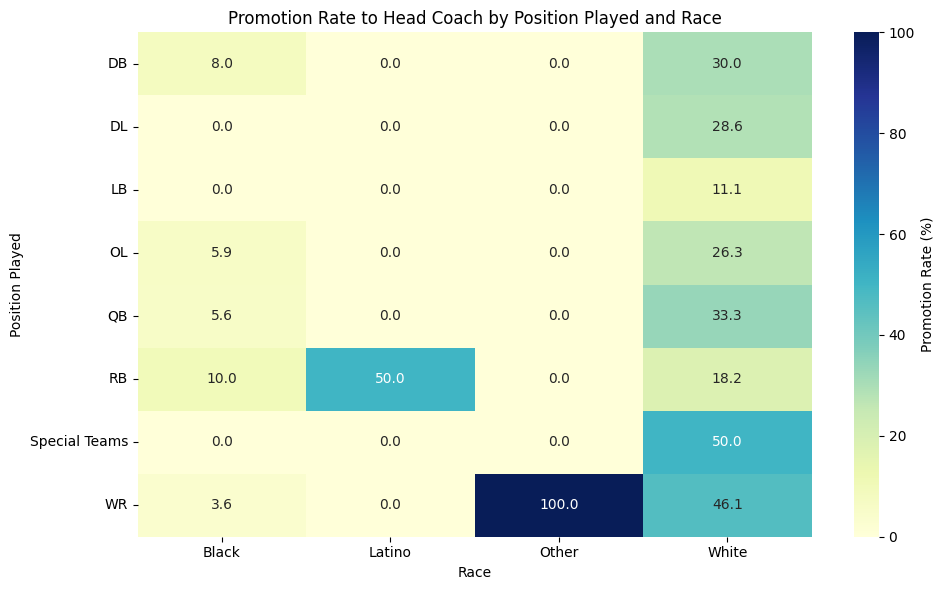

In [23]:
plt.figure(figsize=(10, 6))
sns.heatmap(grouped, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Promotion Rate (%)'})
plt.title("Promotion Rate to Head Coach by Position Played and Race")
plt.xlabel("Race")
plt.ylabel("Position Played")
plt.tight_layout()
plt.show()

In [25]:
from scipy.stats import chi2_contingency, ttest_ind

# 4.2 chi-square test: promotion outcome by race
chi_table = pd.crosstab(df["race"], df["promoted_to_head"])
chi2, p_val, dof, expected = chi2_contingency(chi_table)

# 4.3 t-test: years of experience between promoted Black vs. White coaches
black_exp = df[(df["race"] == "Black") & (df["promoted_to_head"] == 1)]["years_experience"]
white_exp = df[(df["race"] == "White") & (df["promoted_to_head"] == 1)]["years_experience"]

t_stat, t_p_val = ttest_ind(black_exp, white_exp, equal_var=False)

{
    "4.2 Chi-Square": {
        "Contingency Table": chi_table.to_dict(),
        "Chi2 Statistic": chi2,
        "p-value": p_val,
        "Degrees of Freedom": dof
    },
    "4.3 T-Test (Black vs. White Promotions)": {
        "Mean Experience (Black)": round(black_exp.mean(), 2),
        "Mean Experience (White)": round(white_exp.mean(), 2),
        "T-statistic": t_stat,
        "p-value": t_p_val
    }
}


{'4.2 Chi-Square': {'Contingency Table': {0: {'Black': 158,
    'Latino': 22,
    'Other': 9,
    'White': 71},
   1: {'Black': 6, 'Latino': 1, 'Other': 1, 'White': 32}},
  'Chi2 Statistic': np.float64(43.02177140313794),
  'p-value': np.float64(2.4349468626401945e-09),
  'Degrees of Freedom': 3},
 '4.3 T-Test (Black vs. White Promotions)': {'Mean Experience (Black)': np.float64(14.5),
  'Mean Experience (White)': np.float64(11.5),
  'T-statistic': np.float64(1.255865991094136),
  'p-value': np.float64(0.24604072913938524)}}